In [1]:
#training images
import scriptrunner as sr
import os
import script_to_video_pipeline as stv


2023-11-29 01:15:59.267042: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 01:15:59.291108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 01:15:59.665658: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Initializing the conversion map


In [2]:
sceneList=['<Ayush> <Kevin> and  <Sydney> were sitting at the table and eating dinner',
           '<Kevin> was surfing in the morning ' ,
           '<Ayush> and <Sydney> were reading a book',
           '<Sydney> was walking her dog',
           '<Kevin> and <Ayush> were playing football',
           '<Sydney> was playing basketball with <Ayush> <Kevin>',
           '<Ayush> was playing football with <Messi> and <Zendaya>',
]

custom_pipeline_path="currTemp/output/learned_embeds2.bin"


In [3]:
pipe=stv.ScriptToVideoPipeline()
videopath=pipe.generate_video(sceneList,custom_pipeline=True,custom_pipeline_path=custom_pipeline_path,demo=False)

Generating video for scene 1...
<Ayush> <Kevin> and  <Sydney> were sitting at the table and eating dinner
output/<Ayush> <Kevin> and  <Sydney> were sitting at the table and eating dinner
width 500 height 500


2023-11-29 01:16:02.155615: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Initializing the conversion map
output/<Ayush> <Kevin> and  <Sydney> were sitting at the table and eating dinner
1


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

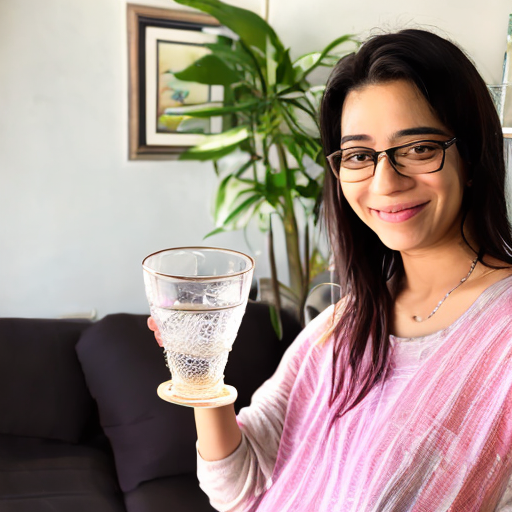

In [29]:
from diffusers import AutoencoderKL, DDPMScheduler, StableDiffusionPipeline, UNet2DConditionModel

pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base"      
)
# If GPU
pipeline = pipeline.to('cuda')
embed_path = "currTemp/output/learned_embeds.bin"
load_learned_embed_in_clip(embed_path, pipeline.text_encoder, pipeline.tokenizer)
torch.manual_seed(80085)
preview = pipeline(f"A picture of <Kameel> holding a glass of water", width = 512, height = 512, guidance_scale=9, num_inference_steps=200).images[0]
preview

  0%|          | 0/200 [00:00<?, ?it/s]

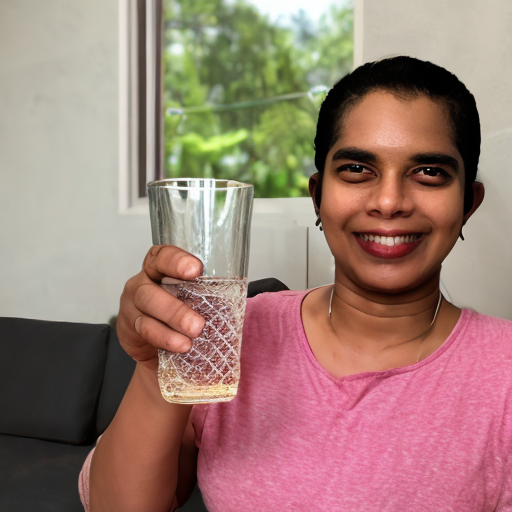

In [32]:
torch.manual_seed(80085)
preview = pipeline(f"A picture of Kameel holding a glass of water", width = 512, height = 512, guidance_scale=9, num_inference_steps=200).images[0]
preview